In [47]:
import scanpy as sc
import pandas as pd
import pandas as pd
from matplotlib import rcParams
from matplotlib import style
import matplotlib.pyplot as plt
import scirpy as ir
import anndata

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = 16,14
pd.set_option('display.max_columns', None) 


In [2]:
tp1 = sc.read_h5ad('/home/matthew/Research/HL_PD1/tcell_subsets/t1.h5ad')
tp2 = sc.read_h5ad('/home/matthew/Research/HL_PD1/tcell_subsets/t2.h5ad')
tp3 = sc.read_h5ad('/home/matthew/Research/HL_PD1/tcell_subsets/t3.h5ad')
tp4 = sc.read_h5ad('/home/matthew/Research/HL_PD1/tcell_subsets/t4.h5ad')
tp5 = sc.read_h5ad('/home/matthew/Research/HL_PD1/tcell_subsets/t5.h5ad')
tp6 = sc.read_h5ad('/home/matthew/Research/HL_PD1/tcell_subsets/t6.h5ad')

print(tp1)
print(tp2)
print(tp3)
print(tp4)
print(tp5)
print(tp6)

AnnData object with n_obs × n_vars = 1061 × 16420
    obs: 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'new.ident', 'integrated_snn_res.1'
    var: 'name'
    obsm: 'X_pca', 'X_umap'
AnnData object with n_obs × n_vars = 1380 × 16420
    obs: 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'new.ident', 'integrated_snn_res.1'
    var: 'name'
    obsm: 'X_pca', 'X_umap'
AnnData object with n_obs × n_vars = 1910 × 16420
    obs: 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'new.ident', 'integrated_snn_res.1'
    var: 'name'

In [3]:
tp1.obs['Timepoint'] = '1'
tp2.obs['Timepoint'] = '2'
tp3.obs['Timepoint'] = '3'
tp4.obs['Timepoint'] = '4'
tp5.obs['Timepoint'] = '5'
tp6.obs['Timepoint'] = '6'

tp1.obs['Disease_status'] = 'HL'
tp2.obs['Disease_status'] = 'Remission'
tp3.obs['Disease_status'] = 'Remission'
tp4.obs['Disease_status'] = 'Relapse'
tp5.obs['Disease_status'] = 'Relapse'
tp6.obs['Disease_status'] = 'Relapse'

tp1.obs['Pembrolizumab'] = 'No'
tp2.obs['Pembrolizumab'] = 'Yes'
tp3.obs['Pembrolizumab'] = 'Yes'
tp4.obs['Pembrolizumab'] = 'No'
tp5.obs['Pembrolizumab'] = 'Yes'
tp6.obs['Pembrolizumab'] = 'No'

tp1.obs['iRAE'] = 'No'
tp2.obs['iRAE'] = 'Yes'
tp3.obs['iRAE'] = 'No'
tp4.obs['iRAE'] = 'No'
tp5.obs['iRAE'] = 'Yes'
tp6.obs['iRAE'] = 'No'



In [4]:
tp1_tcr = ir.io.read_10x_vdj(
    "/home/matthew/datatransfer/vdj/trial_2/151231_T-cell_D1000_cellranger_vdj_v2p2p0_refdata-cellranger-vdj-GRCh38-alts-ensembl-2_0_0.outs/all_contig_annotations.json"
)

tp2_tcr = ir.io.read_10x_vdj(
    "/home/matthew/datatransfer/vdj/trial_2/160411_T-cell_D1003_cellranger_vdj_v2p2p0_refdata-cellranger-vdj-GRCh38-alts-ensembl-2_0_0.outs/all_contig_annotations.json"
)

tp3_tcr = ir.io.read_10x_vdj(
    "/home/matthew/datatransfer/vdj/trial_2/161962_T-cell_D1004_cellranger_vdj_v2p2p0_refdata-cellranger-vdj-GRCh38-alts-ensembl-2_0_0.outs/all_contig_annotations.json"
)

tp4_tcr = ir.io.read_10x_vdj(
    "/home/matthew/datatransfer/vdj/trial_2/171094_T-cell_D1001_cellranger_vdj_v2p2p0_refdata-cellranger-vdj-GRCh38-alts-ensembl-2_0_0.outs/all_contig_annotations.json"
)

tp5_tcr = ir.io.read_10x_vdj(
    "/home/matthew/datatransfer/vdj/trial_2/171642_T-cell_D1005_cellranger_vdj_v2p2p0_refdata-cellranger-vdj-GRCh38-alts-ensembl-2_0_0.outs/all_contig_annotations.json"
)

tp6_tcr = ir.io.read_10x_vdj(
    "/home/matthew/datatransfer/vdj/trial_2/180251_T-cell_D1002_cellranger_vdj_v2p2p0_refdata-cellranger-vdj-GRCh38-alts-ensembl-2_0_0.outs/all_contig_annotations.json"
)

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_cdr3' as categ

In [5]:
#function to fix tcr dataframe so we can merge
def fixTcrDF(obj,timepoint,suffix):
    obj.obs['cell_id'] = obj.obs.index
    obj.obs
    obj.obs['cell_id'] = obj.obs['cell_id'].str.replace(suffix, '')
    obj.obs['cell_id'] = timepoint + obj.obs['cell_id'].astype(str)
    obj.obs.index = obj.obs['cell_id']
    obj.obs
    return obj




In [6]:
tp1_tcr = fixTcrDF(tp1_tcr,"Timepoint_1_",'_1')
tp2_tcr = fixTcrDF(tp2_tcr,"Timepoint_2_",'_2')
tp3_tcr = fixTcrDF(tp3_tcr,"Timepoint_3_",'_3')
tp4_tcr = fixTcrDF(tp4_tcr,"Timepoint_4_",'_4')
tp5_tcr = fixTcrDF(tp5_tcr,"Timepoint_5_",'_5')
tp6_tcr = fixTcrDF(tp6_tcr,"Timepoint_6_",'_6')

In [7]:
tp1_tcr.obs

multi_chain IR_VJ_1_locus IR_VJ_2_locus  \
cell_id                                                                   
Timepoint_1_AAACCTGAGAGAGCTC-1        False           NaN           NaN   
Timepoint_1_AAACCTGGTGTTTGGT-1        False           NaN           NaN   
Timepoint_1_AAACGGGTCTTGCCGT-1        False           NaN           NaN   
Timepoint_1_AAAGATGAGTCCAGGA-1        False           NaN           NaN   
Timepoint_1_AAAGATGCATCACGTA-1        False           NaN           NaN   
...                                     ...           ...           ...   
Timepoint_1_TTTGCGCGTTCCACGG-1        False           TRA           NaN   
Timepoint_1_TTTGCGCTCAGTGCAT-1        False           NaN           NaN   
Timepoint_1_TTTGGTTAGTTCGCAT-1        False           TRA           NaN   
Timepoint_1_TTTGGTTTCACTATTC-1        False           NaN           NaN   
Timepoint_1_TTTGTCAGTGCAACTT-1        False           TRA           NaN   

                               IR_VDJ_1_locus IR_VDJ_2_locus    IR_VJ_1_cdr3  \
cell_id                                                                        
Timepoint_1_AAACCTGAGAGAGCTC-1            NaN            NaN            None   
Timepoint_1_AAACCTGGTGTTTGGT-1            NaN            NaN            None   
Timepoint_1_AAACGGGTCTTGCCGT-1            NaN            NaN            None   
Timepoint_1_AAAGATGAGTCCAGGA-1            TRB            NaN            None   
Timepoint_1_AAAGATGCATCACGTA-1            NaN            NaN            None   
...                                       ...            ...             ...   
Timepoint_1_TTTGCGCGTTCCACGG-1            TRB            NaN     CIAQGAQKLVF   
Timepoint_1_TTTGCGCTCAGTGCAT-1            TRB            NaN            None   
Timepoint_1_TTTGGTTAGTTCGCAT-1            TRB            NaN  CATDDWGGADGLTF   
Timepoint_1_TTTGGTTTCACTATTC-1            NaN            NaN            None   
Timepoint_1_TTTGTCAGTGCAACTT-1            TRB            NaN     CATDAINDMRF   

                               IR_VJ_2_cdr3     IR_VDJ_1_cdr3 IR_VDJ_2_cdr3  \
cell_id                                                                       
Timepoint_1_AAACCTGAGAGAGCTC-1         None              None          None   
Timepoint_1_AAACCTGGTGTTTGGT-1         None              None          None   
Timepoint_1_AAACGGGTCTTGCCGT-1         None              None          None   
Timepoint_1_AAAGATGAGTCCAGGA-1         None  CASSYEDSPWGGEQFF          None   
Timepoint_1_AAAGATGCATCACGTA-1         None              None          None   
...                                     ...               ...           ...   
Timepoint_1_TTTGCGCGTTCCACGG-1         None   CSADLAGGAKNIQYF          None   
Timepoint_1_TTTGCGCTCAGTGCAT-1         None     CASSFSRSYEQYF          None   
Timepoint_1_TTTGGTTAGTTCGCAT-1         None      CASSEFGGELFF          None   
Timepoint_1_TTTGGTTTCACTATTC-1         None              None          None   
Timepoint_1_TTTGTCAGTGCAACTT-1         None    CASSLGGATDTQYF          None   

                                                           IR_VJ_1_cdr3_nt  \
cell_id                                                                      
Timepoint_1_AAACCTGAGAGAGCTC-1                                        None   
Timepoint_1_AAACCTGGTGTTTGGT-1                                        None   
Timepoint_1_AAACGGGTCTTGCCGT-1                                        None   
Timepoint_1_AAAGATGAGTCCAGGA-1                                        None   
Timepoint_1_AAAGATGCATCACGTA-1                                        None   
...                                                                    ...   
Timepoint_1_TTTGCGCGTTCCACGG-1           TGCATCGCCCAGGGAGCCCAGAAGCTGGTATTT   
Timepoint_1_TTTGCGCTCAGTGCAT-1                                        None   
Timepoint_1_TTTGGTTAGTTCGCAT-1  TGTGCTACGGACGACTGGGGAGGTGCTGACGGACTCACCTTT   
Timepoint_1_TTTGGTTTCACTATTC-1                                        None   
Timepoint_1_TTTGTCAGTGCAACTT-1           TGTGCTACGG

In [8]:
ir.pp.merge_with_ir(tp1, tp1_tcr)
ir.pp.merge_with_ir(tp2, tp2_tcr)
ir.pp.merge_with_ir(tp3, tp3_tcr)
ir.pp.merge_with_ir(tp4, tp4_tcr)
ir.pp.merge_with_ir(tp5, tp5_tcr)
ir.pp.merge_with_ir(tp6, tp6_tcr)

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'Timepoint' as categorical
... storing 'Disease_status' as categorical
... storing 'Pembrolizumab' as categorical
... storing 'iRAE' as categorical
... storing 'cell_id' as categorical
... storing 'multi_chain' as categorical
... storing 'Timepoint' as categorical
... storing 'Disease_status' as categorical
... storing 'Pembrolizumab' as categorical
... storing 'iRAE' as categorical
... storing 'cell_id' as categorical
... storing 'multi_chain' as categorical
... storing 'Timepoint' as categorical
... storing 'Disease_status' as categorical
... storing 'Pembrolizumab' as categorical
... storing 'iRAE' as categorical
... storing 'cell_id' as categorical
... storing 'multi_chain' as categorical
... storing 'Timepoint' a

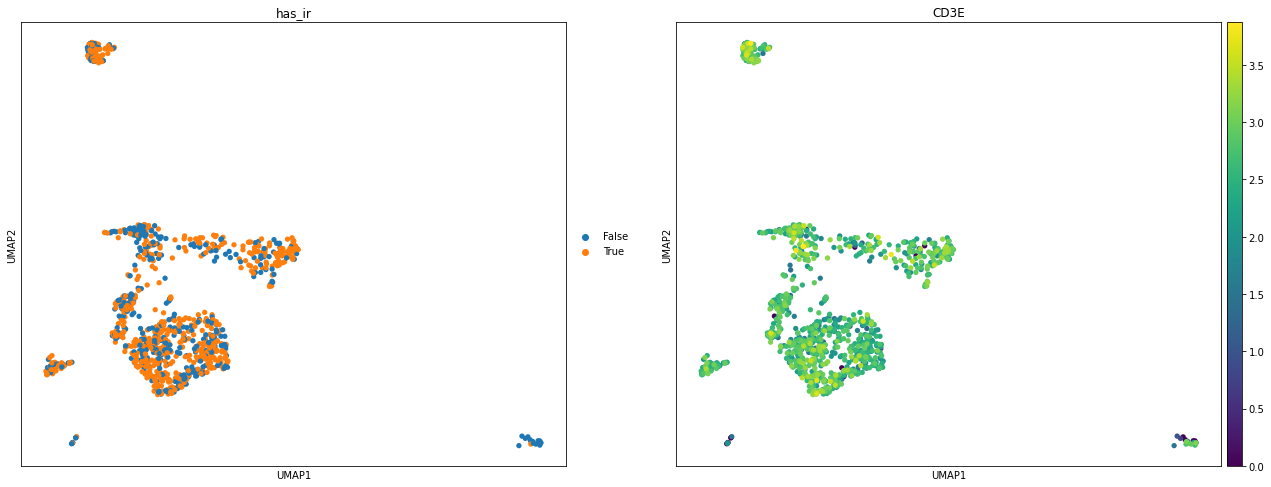

In [11]:
sc.pl.umap(tp1, color=["has_ir", "CD3E"])

In [12]:
adatas = []
adatas.append(tp1)
adatas.append(tp2)
adatas.append(tp3)
adatas.append(tp4)
adatas.append(tp5)
adatas.append(tp6)

adata = adatas[0].concatenate(adatas[1:],index_unique=None)

In [13]:
adata.obs


nCount_RNA  nFeature_RNA  log10GenesPerUMI  \
Timepoint_1_AAACCTGAGAGAGCTC-1      3008.0          1184          0.883584   
Timepoint_1_AAACCTGGTGTTTGGT-1      2711.0          1256          0.902730   
Timepoint_1_AAACGGGTCTTGCCGT-1      1862.0           814          0.890105   
Timepoint_1_AAAGATGAGTCCAGGA-1      4551.0          1369          0.857384   
Timepoint_1_AAAGCAAAGGTGTGGT-1      2603.0          1056          0.885284   
...                                    ...           ...               ...   
Timepoint_6_TTTGCGCTCATCTGTT-1      6837.0          2082          0.865425   
Timepoint_6_TTTGGTTCAAGTACCT-1      5310.0          1623          0.861809   
Timepoint_6_TTTGTCACAAGTTGTC-1      3303.0          1205          0.875552   
Timepoint_6_TTTGTCACAATTGCTG-1      2509.0          1180          0.903627   
Timepoint_6_TTTGTCACACATGGGA-1      4062.0          1449          0.875948   

                                percent_mito  percent_ribo  percent_hb  \
Timepoint_1_AAACCTGAGAGAGCTC-1      6.781915     29.953457         0.0   
Timepoint_1_AAACCTGGTGTTTGGT-1      4.387906     24.151917         0.0   
Timepoint_1_AAACGGGTCTTGCCGT-1      5.209452     30.612245         0.0   
Timepoint_1_AAAGATGAGTCCAGGA-1      5.251593     39.485827         0.0   
Timepoint_1_AAAGCAAAGGTGTGGT-1      5.186323     26.584710         0.0   
...                                      ...           ...         ...   
Timepoint_6_TTTGCGCTCATCTGTT-1      8.363796     25.851733         0.0   
Timepoint_6_TTTGGTTCAAGTACCT-1      1.713748     38.681733         0.0   
Timepoint_6_TTTGTCACAAGTTGTC-1      1.877081     36.845292         0.0   
Timepoint_6_TTTGTCACAATTGCTG-1      7.532882     18.573137         0.0   
Timepoint_6_TTTGTCACACATGGGA-1      2.461841     32.939439         0.0   

                                 S.Score  G2M.Score Phase  nCount_SCT  \
Timepoint_1_AAACCTGAGAGAGCTC-1  0.034645   0.068198   G2M      3409.0   
Timepoint_1_AAACCTGGTGTTTGGT-1  0.021716   0.025207   G2M      3287.0   
Timepoint_1_AAACGGGTCTTGCCGT-1 -0.021759  -0.014021    G1      3266.0   
Timepoint_1_AAAGATGAGTCCAGGA-1  0.047148  -0.018358     S      3996.0   
Timepoint_1_AAAGCAAAGGTGTGGT-1 -0.045752   0.065598   G2M      3311.0   
...                                  ...        ...   ...         ...   
Timepoint_6_TTTGCGCTCATCTGTT-1 -0.024576   0.046420   G2M      4022.0   
Timepoint_6_TTTGGTTCAAGTACCT-1  0.090187   0.007137     S      3799.0   
Timepoint_6_TTTGTCACAAGTTGTC-1  0.054811  -0.038137     S      3288.0   
Timepoint_6_TTTGTCACAATTGCTG-1 -0.009382  -0.069536    G1      2889.0   
Timepoint_6_TTTGTCACACATGGGA-1  0.069706   0.036985     S      3585.0   

                                nFeature_SCT integrated_snn_res.0.8  \
Timepoint_1_AAACCTGAGAGAGCTC-1          1181                      2   
Timepoint_1_AAACCTGGTGTTTGGT-1          1253                      5   
Timepoint_1_AAACGGGTCTTGCCGT-1           838                      1   
Timepoint_1_AAAGATGAGTCCAGGA-1          1366                      2   
Timepoint_1_AAAGCAAAGGTGTGGT-1          1057                      3   
...                                      ...                    ...   
Timepoint_6_TTTGCGCTCATCTGTT-1          1860                      1   
Timepoint_6_TTTGGTTCAAGTACCT-1          1592                     10   
Timepoint_6_TTTGTCACAAGTTGTC-1          1201                      2   
Timepoint_6_TTTGTCACAATTGCTG-1          1179                      2   
Timepoint_6_TTTGTCACACATGGGA-1          1445                      7   

                               seurat_clusters   new.ident  \
Timepoint_1_AAACCTGAGAGAGCTC-1               3     CD4 TH2   
Timepoint_1_AAACCTGGTGTTTGGT-1               4   CD8 TCM-1   
Timepoint_1_AAACGGGTCTTGCCGT-1               1   CD8 TEM-1   
Timepoint_1_AAAGATGAGTCCAGGA-1               3     CD4 TH2   
Timepoint_1_AAAGCAAAGGTGTGGT-1               2   CD8 TEM-2   
...                                        ...         ...   
Timepoint_6_TTTGCGCTCATCTGTT-1            

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'Timepoint' as categorical
... storing 'Disease_status' as categorical
... storing 'Pembrolizumab' as categorical
... storing 'iRAE' as categorical
... storing 'cell_id' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_2_expr' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR

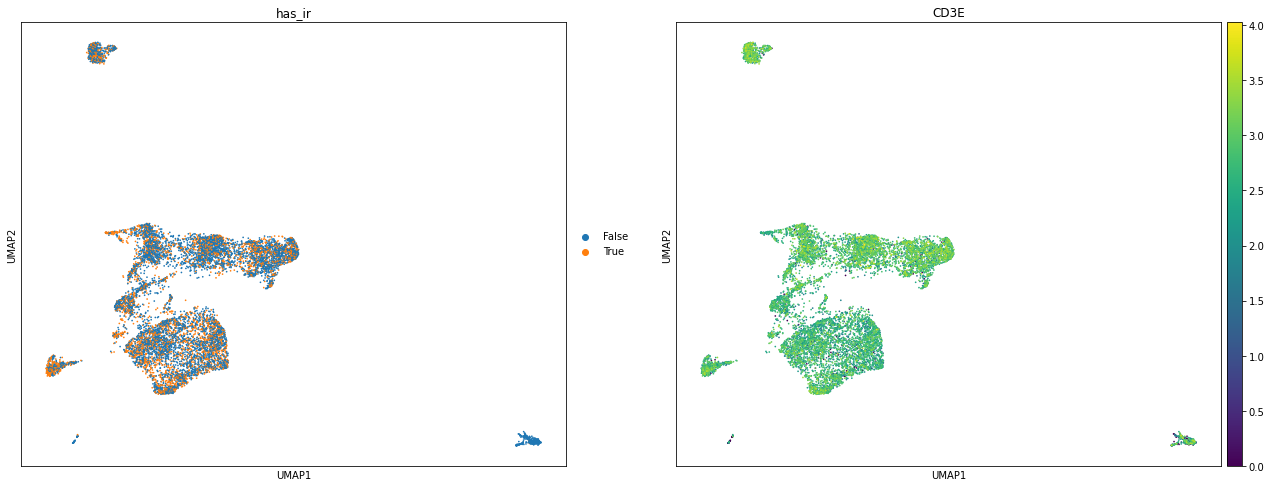

In [14]:
sc.pl.umap(adata, color=["has_ir", "CD3E"])

... storing 'receptor_type' as categorical
... storing 'receptor_subtype' as categorical
... storing 'chain_pairing' as categorical


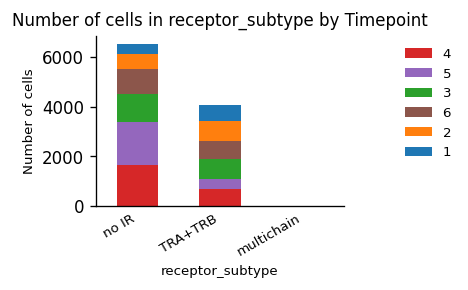

In [15]:
#qc

ir.tl.chain_qc(adata)
ir.pl.group_abundance(adata, groupby="receptor_subtype", target_col="Timepoint")

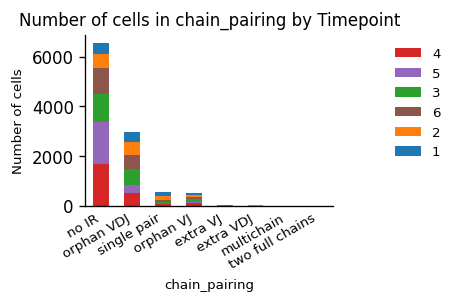

In [16]:
ir.pl.group_abundance(adata, groupby="chain_pairing", target_col="Timepoint")

In [34]:
#receptor_arms="any"
#receptor_arms="all"
ir.pp.ir_neighbors(adata, receptor_arms="all", dual_ir="primary_only")

100%|██████████| 131255/131255 [00:00<00:00, 172321.59it/s]


In [35]:
ir.tl.define_clonotypes(adata)

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'clonotype' as categorical


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f34c6589ac8>],
      dtype=object)

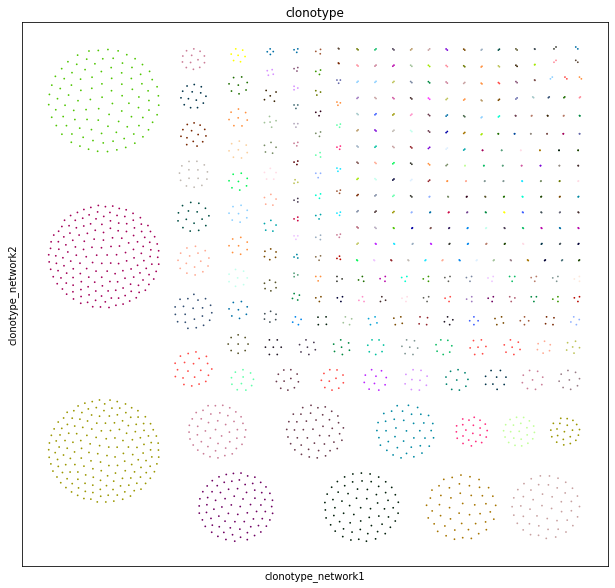

In [36]:
ir.tl.clonotype_network(adata, min_size=2)
ir.pl.clonotype_network(adata, color="clonotype", legend_loc="none")

In [37]:
sc.settings.verbosity = 4
ir.pp.ir_neighbors(
    adata,
    metric="alignment",
    sequence="aa",
    cutoff=15,
    receptor_arms="all",
    dual_ir="all",
)
ir.tl.define_clonotype_clusters(
    adata, partitions="connected", sequence="aa", metric="alignment", within_group=None
)

ir.tl.clonotype_network(adata, min_size=4, sequence="aa", metric="alignment")

Initializing IrNeighbors object...
Finished initalizing IrNeighbors object.  (0:00:00)
Computing VJ pairwise distances...
100%|██████████| 136/136 [00:00<00:00, 163.57it/s]
Finished computing VJ pairwise distances. (0:00:00)
Computing VDJ pairwise distances...
100%|██████████| 861/861 [00:05<00:00, 147.16it/s]
Finished computing VDJ pairwise distances. (0:00:05)
Started comstructing VJ coord-dictionary...
100%|██████████| 1180/1180 [00:00<00:00, 11147.20it/s]
Finished constructing VJ coord-dictionary (0:00:00)
Started comstructing VDJ coord-dictionary...
100%|██████████| 3251/3251 [00:00<00:00, 12861.70it/s]
Finished constructing VDJ coord-dictionary (0:00:00)
Constructing cell x cell distance matrix...
100%|██████████| 148843/148843 [00:00<00:00, 221678.04it/s]
Finished constructing cell x cell distance matrix.  (0:00:00)
    Started converting distances to connectivities. 
    Finished converting distances to connectivities.  (0:00:00)


/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'ct_cluster_aa_alignment' as categorical


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f34c6751ac8>],
      dtype=object)

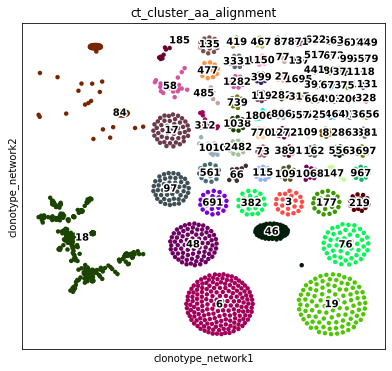

In [38]:
ir.pl.clonotype_network(
    adata,
    color="ct_cluster_aa_alignment",
    legend_fontoutline=3,
    size=80,
    panel_size=(6, 6),
    legend_loc="on data",
)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f34c67aecf8>],
      dtype=object)

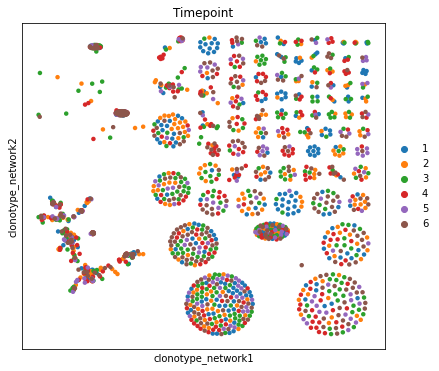

In [39]:
ir.pl.clonotype_network(adata, color="Timepoint", size=80, panel_size=(6, 6))


In [40]:
ir.tl.define_clonotype_clusters(
    adata,
    sequence="aa",
    metric="alignment",
    same_v_gene="primary_only",
    key_added="ct_cluster_aa_alignment_same_v",
)


In [41]:
ct_different_v = adata.obs.groupby("ct_cluster_aa_alignment").apply(
    lambda x: x["ct_cluster_aa_alignment_same_v"].unique().size > 1
)
ct_different_v = ct_different_v[ct_different_v].index.values
ct_different_v

['6', '18', '24', '38', '46', ..., '5836', '6739', '7250', '7667', '7742']
Length: 106
Categories (8569, object): ['0', '1', '2', '3', ..., '8565', '8566', '8567', '8568']

In [42]:
ir.tl.clonal_expansion(adata)

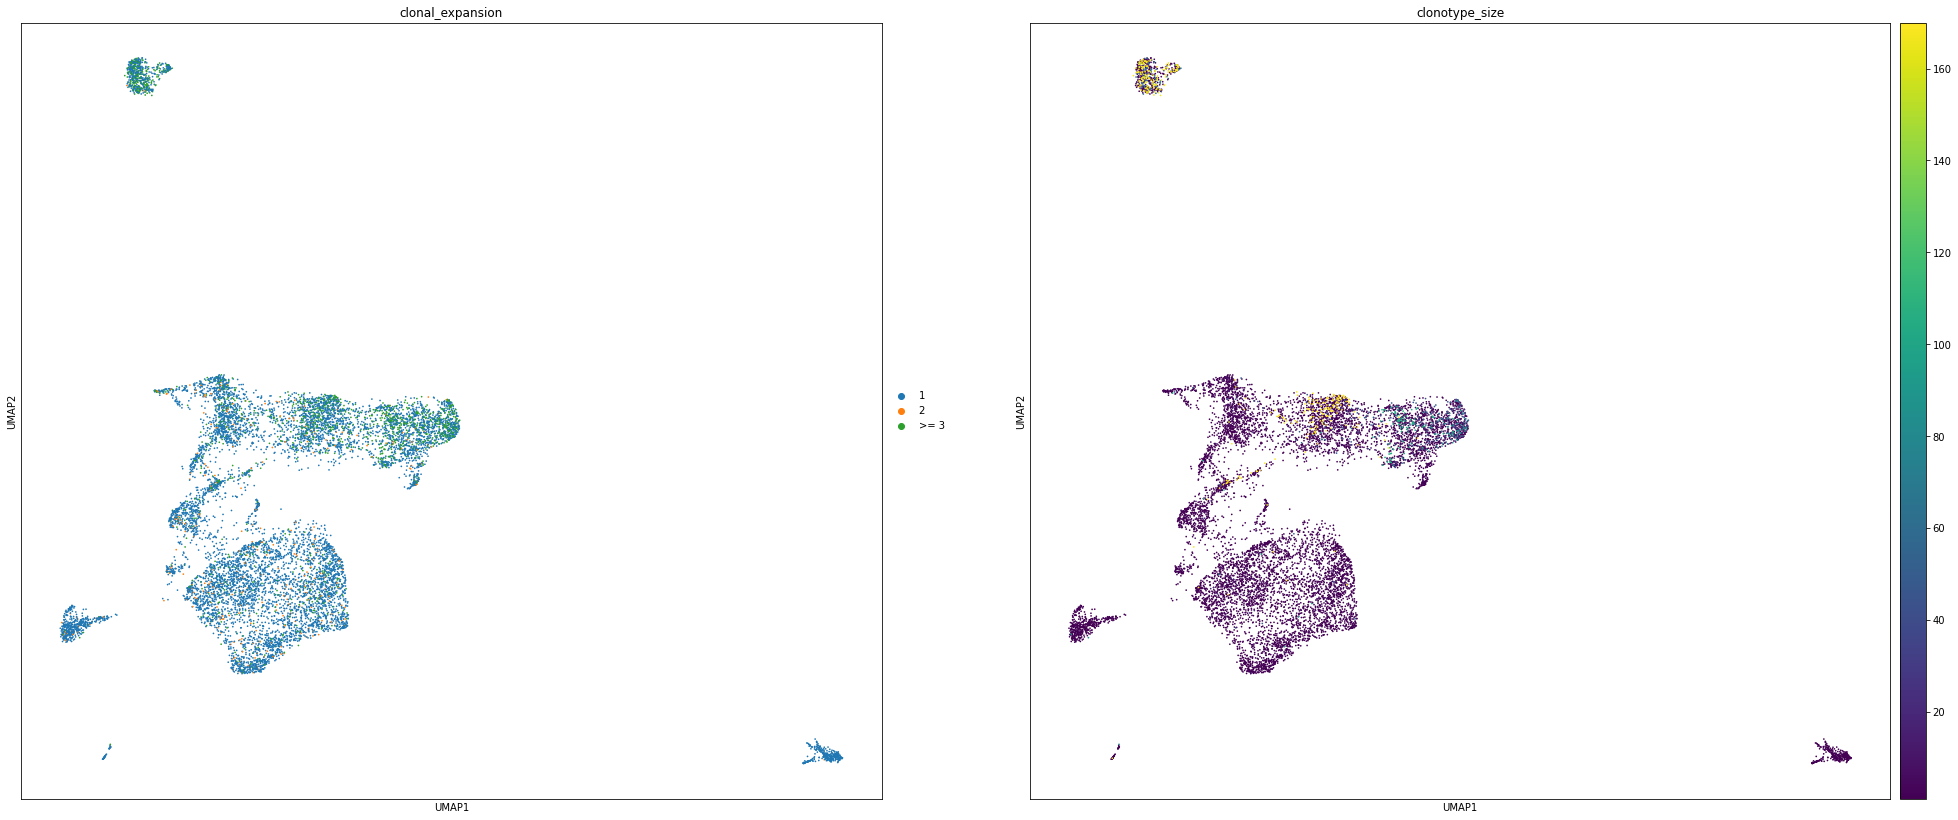

In [50]:
sc.pl.umap(adata, color=["clonal_expansion", "clonotype_size"])

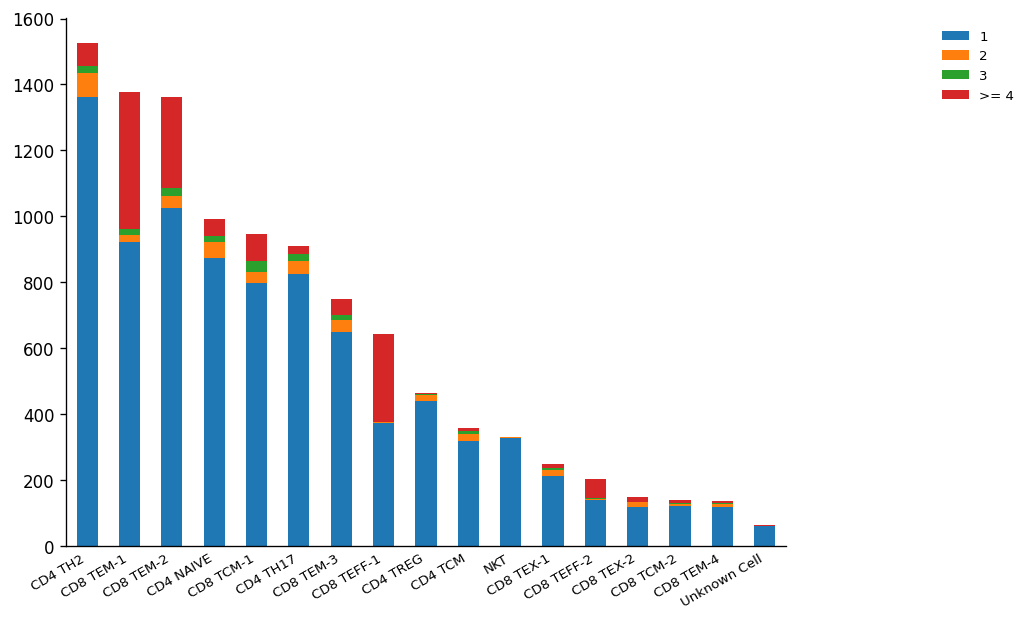

In [61]:
ir.pl.clonal_expansion(adata, groupby="new.ident", clip_at=4, normalize=False,figsize=(10,8))


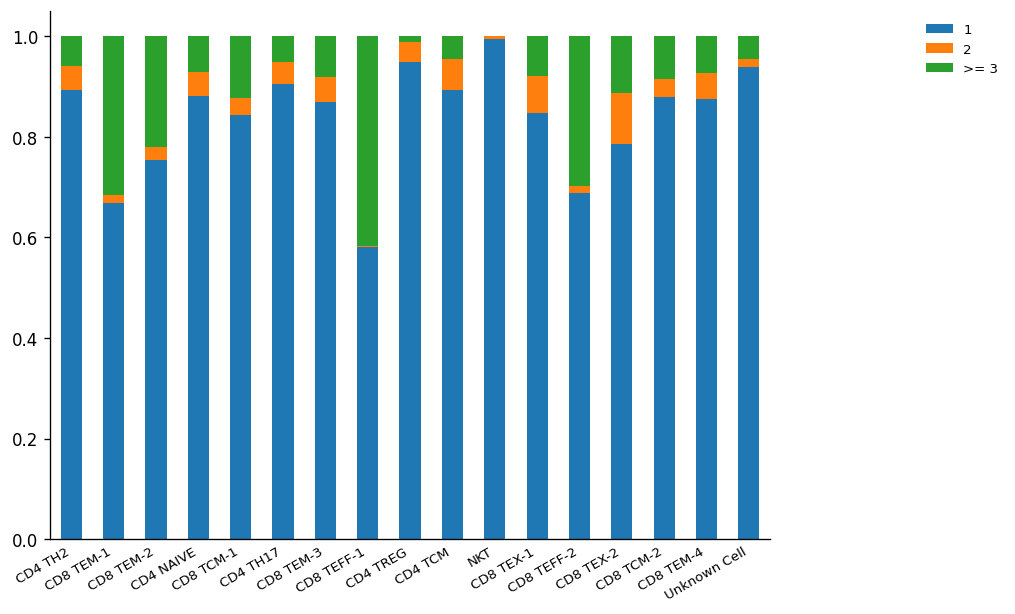

In [60]:
ir.pl.clonal_expansion(adata, "new.ident",figsize=(10,8))

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


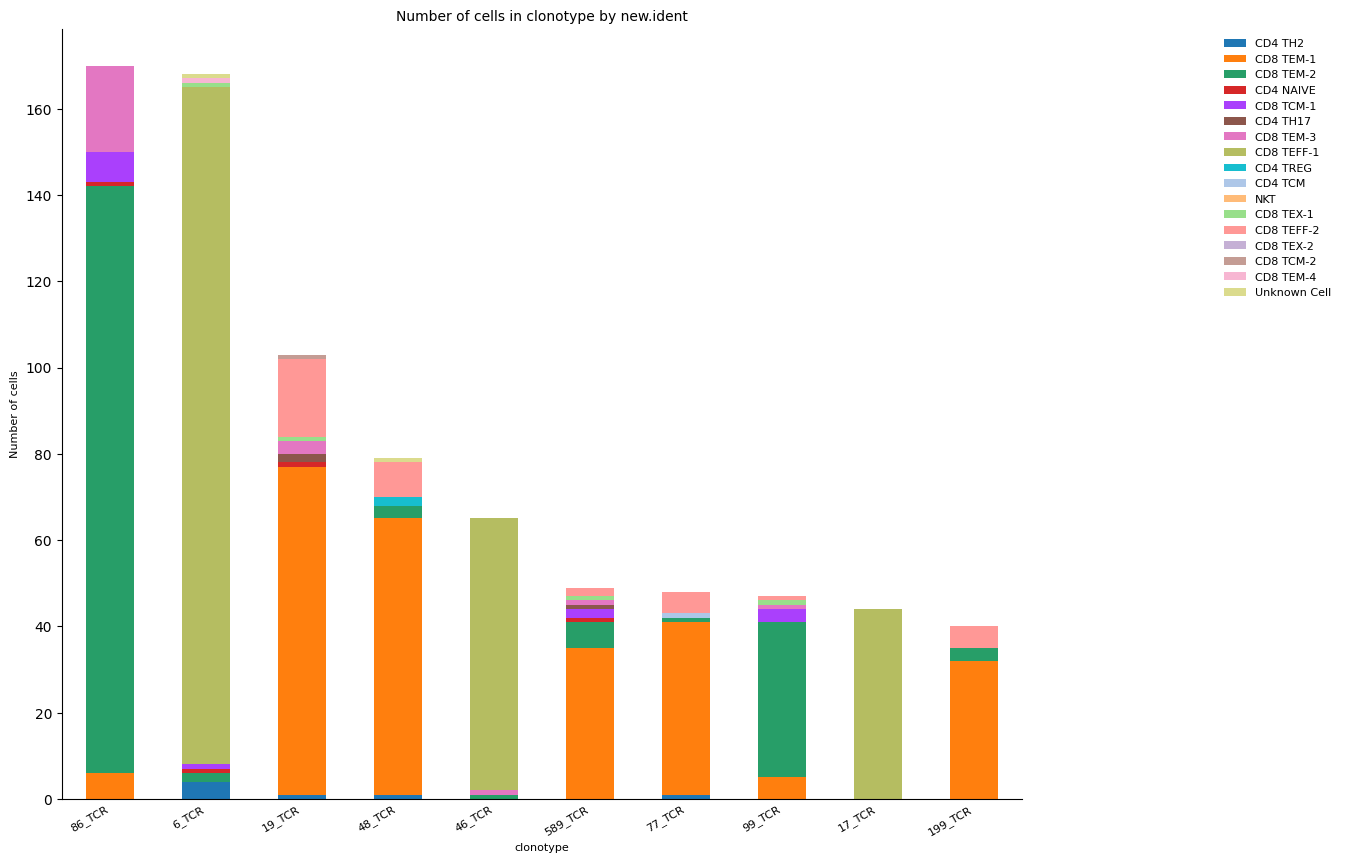

In [95]:
ir.pl.group_abundance(adata, groupby="clonotype", target_col="new.ident", max_cols=10,fig_kws={"dpi": 100})

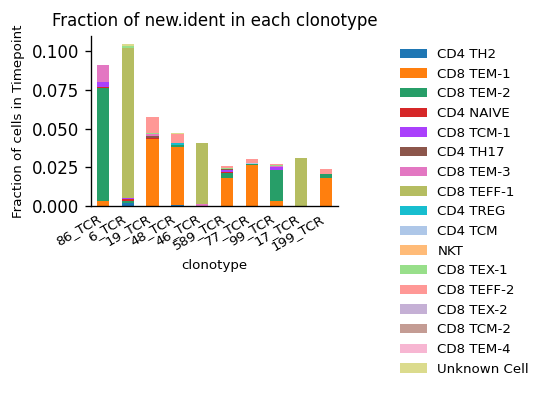

In [64]:
ir.pl.group_abundance(
    adata, groupby="clonotype", target_col="new.ident", max_cols=10, normalize="Timepoint" ,fig_kws={"dpi": 100}
)

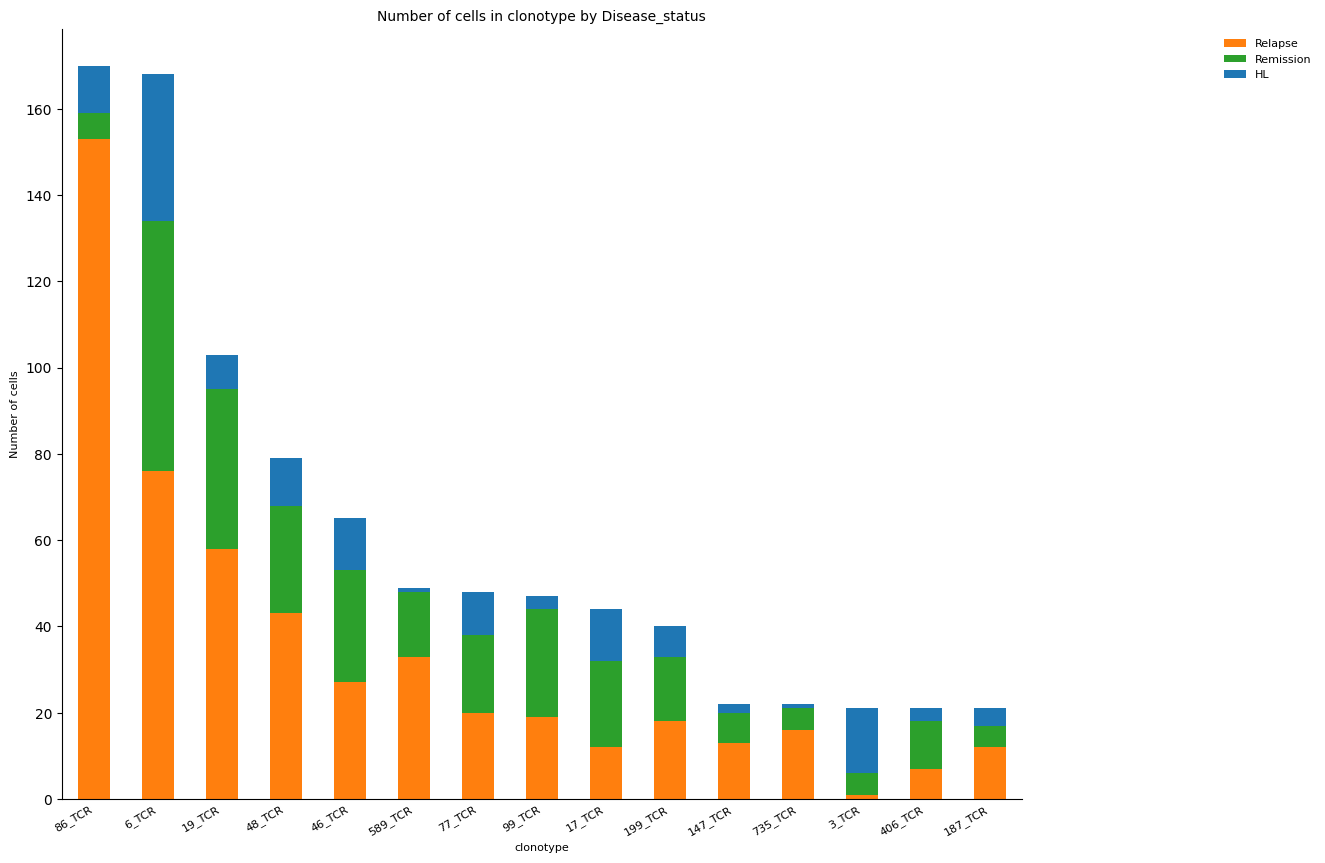

In [66]:
ax = ir.pl.group_abundance(
    adata, groupby="clonotype", target_col="Disease_status", max_cols=15, fig_kws={"dpi": 100}
)



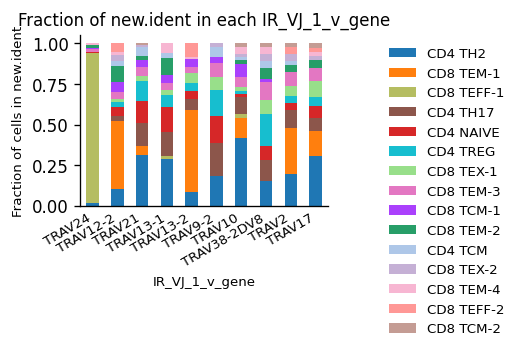

In [67]:
ir.pl.group_abundance(
    adata, groupby="IR_VJ_1_v_gene", target_col="new.ident", normalize=True, max_cols=10
)



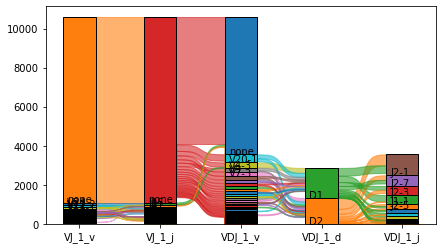

In [70]:
ir.pl.vdj_usage(adata, full_combination=False, max_segments=None, max_ribbons=30)

In [71]:
df, dst, lk = ir.tl.repertoire_overlap(adata, "Timepoint", inplace=False)
df.head()

clonotype  0_no IR  1_no IR  2_no IR  3_TCR  4_no IR  5_TCR  6_TCR  7_TCR  \
Timepoint                                                                   
1              1.0      1.0      1.0   15.0      1.0    1.0   34.0    1.0   
2              0.0      0.0      0.0    3.0      0.0    0.0   24.0    0.0   
3              0.0      0.0      0.0    2.0      0.0    0.0   34.0    0.0   
4              0.0      0.0      0.0    0.0      0.0    0.0   24.0    0.0   
5              0.0      0.0      0.0    1.0      0.0    0.0   25.0    0.0   

clonotype  8_TCR  9_TCR  10_TCR  11_TCR  12_no IR  13_no IR  14_no IR  15_TCR  \
Timepoint                                                                       
1            4.0    1.0     1.0     1.0       1.0       1.0       1.0     1.0   
2            1.0    0.0     0.0     0.0       0.0       0.0       0.0     0.0   
3            1.0    0.0     0.0     0.0       0.0       0.0       0.0     0.0   
4            0.0    0.0     0.0     0.0       0.0       0.0       0.0     0.0   
5            0.0    0.0     0.0     0.0       0.0       0.0       0.0     0.0   

clonotype  16_TCR  17_TCR  18_TCR  19_TCR  20_TCR  21_no IR  22_TCR  23_no IR  \
Timepoint                                                                       
1             1.0    12.0     1.0     8.0     1.0       1.0     1.0       1.0   
2             1.0    15.0     0.0    12.0     0.0       0.0     0.0       0.0   
3             0.0     5.0     0.0    25.0     0.0       0.0     0.0       0.0   
4             0.0     4.0     0.0    21.0     0.0       0.0     0.0       0.0   
5             0.0     2.0     0.0    15.0     0.0       0.0     0.0       0.0   

clonotype  24_TCR  25_TCR  26_no IR  27_TCR  28_no IR  29_no IR  30_TCR  \
Timepoint                                                                 
1             1.0     2.0       1.0     1.0       1.0       1.0     1.0   
2             0.0     1.0       0.0     0.0       0.0       0.0     0.0   
3             0.0     0.0       0.0     2.0       0.0       0.0     0.0   
4             0.0     0.0       0.0     0.0       0.0       0.0     0.0   
5             0.0     0.0       0.0     1.0       0.0       0.0     0.0   

clonotype  31_no IR  32_TCR  33_no IR  34_no IR  35_no IR  36_TCR  37_TCR  \
Timepoint                                                                   
1               1.0     1.0       1.0       1.0       1.0     2.0     1.0   
2               0.0     0.0       0.0       0.0       0.0     1.0     0.0   
3               0.0     0.0       0.0       0.0       0.0     1.0     0.0   
4               0.0     0.0       0.0       0.0       0.0     0.0     0.0   
5               0.0     0.0       0.0       0.0       0.0     0.0     0.0   

clonotype  38_TCR  39_TCR  40_no IR  41_no IR  42_no IR  43_no IR  44_no IR  \
Timepoint                                                                     
1             1.0     1.0       1.0       1.0       1.0       1.0       1.0   
2             0.0     0.0       0.0       0.0       0.0       0.0       0.0   
3             0.0     0.0       0.0       0.0       0.0       0.0       0.0   
4             0.0     0.0       0.0       0.0       0.0       0.0       0.0   
5             0.0     0.0       0.0       0.0       0.0       0.0       0.0   

clonotype  45_TCR  46_TCR  47_no IR  48_TCR  49_no IR  50_TCR  51_TCR  \
Timepoint                                                               
1             1.0    12.0       1.0    11.0       1.0     1.0     1.0   
2             0.0    12.0       0.0     7.0       0.0     0.0     0.0   
3             0.0    14.0       0.0    18.0       0.0     0.0     0.0   
4             0.0     6.0       0.0    11.0       0.0     0.0     0.0   
5             0.0    11.0       0.0     5.0       0.0     0.0     0.0   

clonotype  52_no IR  53_TCR  54_TCR  55_TCR  56_no IR  57_TCR  58_TCR  59_TCR  \
Timepoint                                                                       
1               1.0     1.0   

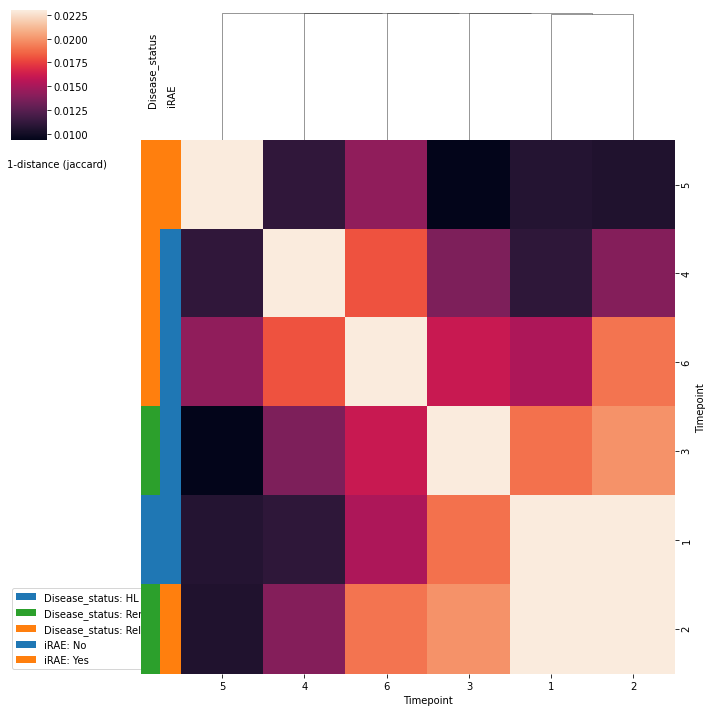

In [82]:
ir.pl.repertoire_overlap(adata, "Timepoint", heatmap_cats=["Disease_status","iRAE"],figsize=(14,10))

In [85]:
adata.obs.loc[adata.obs["has_ir"] == "False", "clonotype_size"] = 0

In [88]:
freq, stat = ir.tl.clonotype_imbalance(
    adata,
    replicate_col="Timepoint",
    groupby="new.ident",
    case_label="CD4 TH2",
    control_label="CD8 TEM-1",
    inplace=False,
)
top_differential_clonotypes = stat["clonotype"].tolist()[:5]

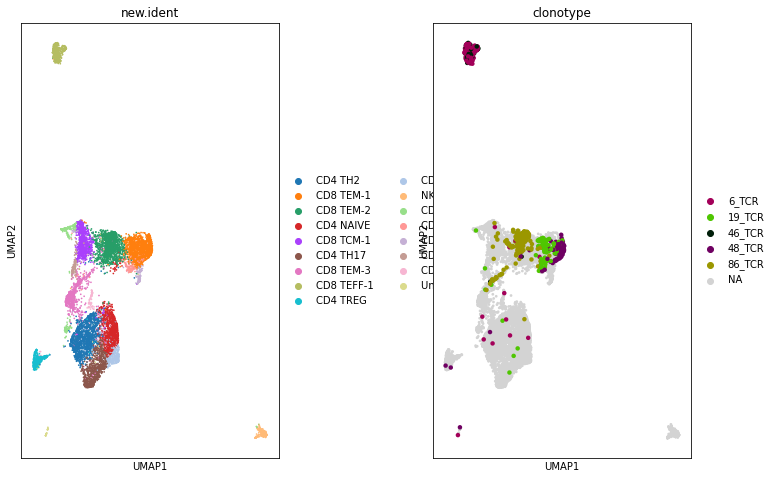

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={"wspace": 0.6})
sc.pl.umap(adata, color="new.ident", ax=ax1, show=False)
sc.pl.umap(
    adata,
    color="clonotype",
    groups=top_differential_clonotypes,
    ax=ax2,
    # increase size of highlighted dots
    size=[
        80 if c in top_differential_clonotypes else 30 for c in adata.obs["clonotype"]
    ],
)

ranking genes
    consider 'clonotype' groups:
    with sizes: [168 170]
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


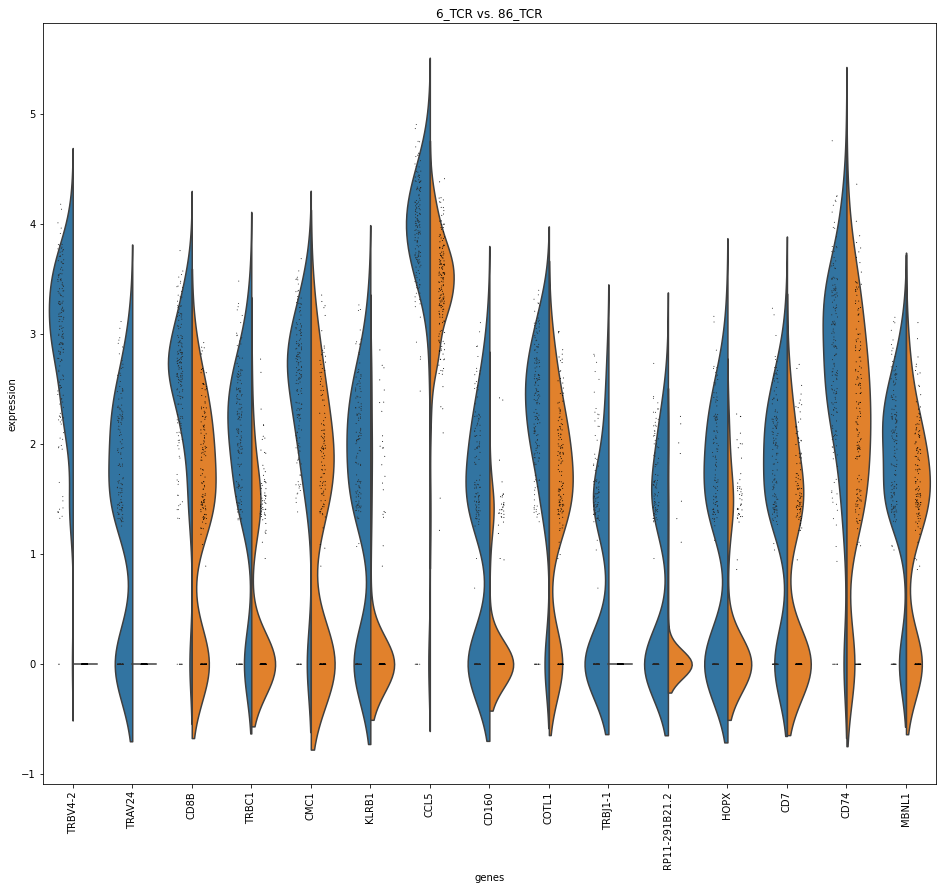

In [91]:
sc.tl.rank_genes_groups(
    adata, "clonotype", groups=["6_TCR"], reference="86_TCR", method="wilcoxon"
)
sc.pl.rank_genes_groups_violin(adata, groups="6_TCR", n_genes=15)



In [92]:
# save output to input back into seurat
adata.obs.to_csv("/home/matthew/Research/HL_PD1/tcell_subsets/tcr_analyzed.csv")

In [93]:
# plot for each timepoint
t1 = adata[adata.obs['Timepoint'].isin(['1'])]
t2 = adata[adata.obs['Timepoint'].isin(['2'])]
t3 = adata[adata.obs['Timepoint'].isin(['3'])]
t4 = adata[adata.obs['Timepoint'].isin(['4'])]
t5 = adata[adata.obs['Timepoint'].isin(['5'])]
t6 = adata[adata.obs['Timepoint'].isin(['6'])]



/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (10601×10601).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['distances'] that happens to be dimensioned at n_obs×n_obs (10601×10601).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_aa_alignment']['connectivities'] that happens to be dimensioned at n_obs×n_obs (10601×1060

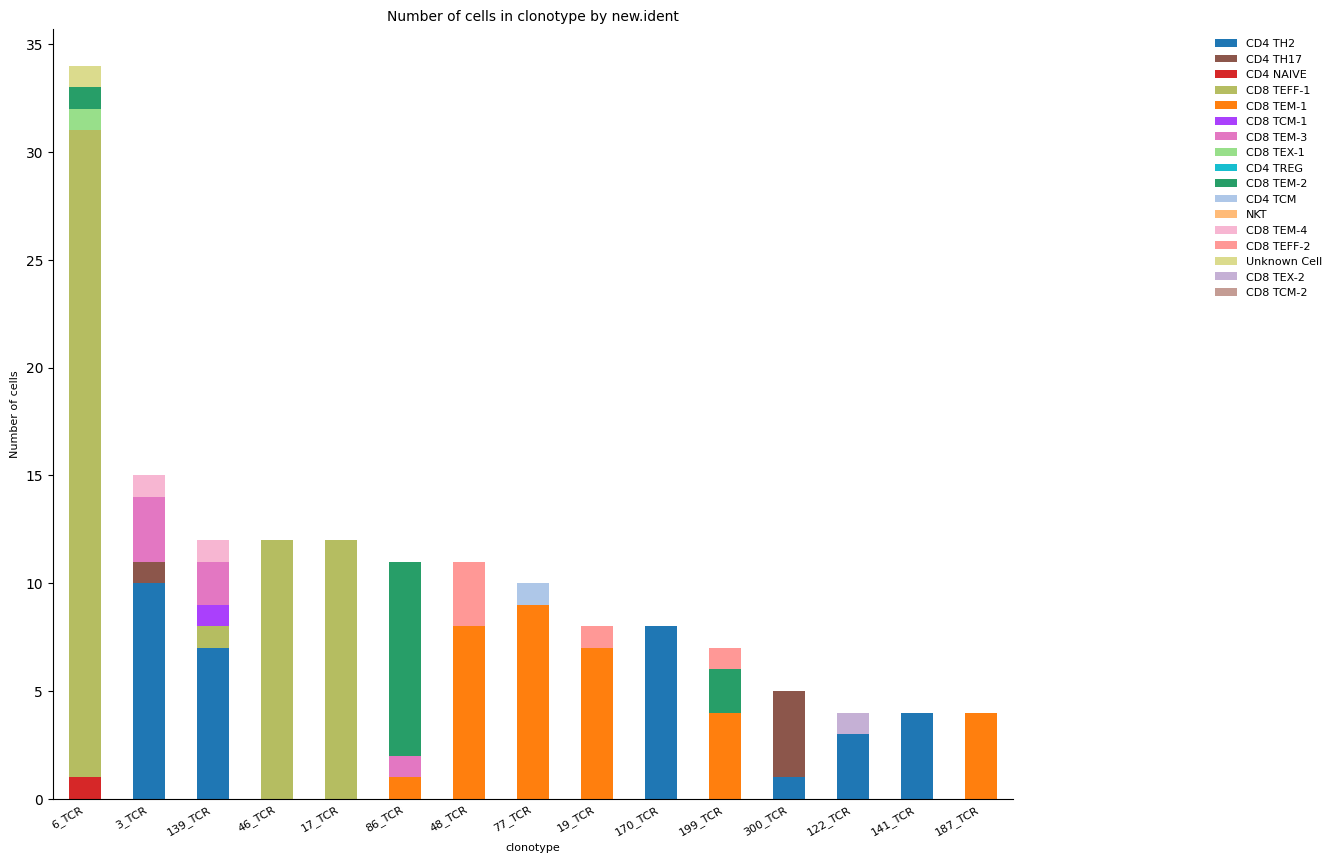

In [96]:
ir.pl.group_abundance(t1, groupby="clonotype", target_col="new.ident", max_cols=15,fig_kws={"dpi": 100})

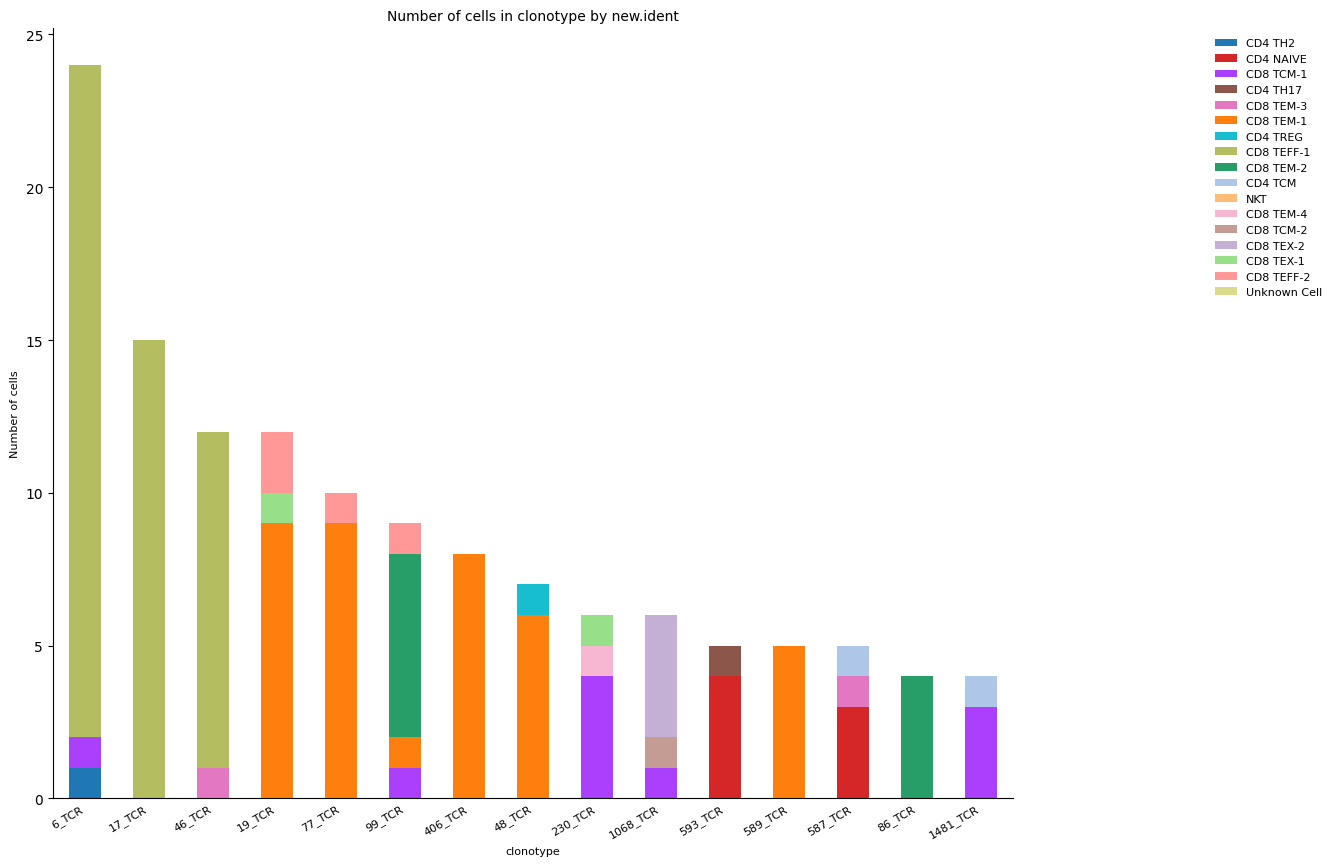

In [97]:
ir.pl.group_abundance(t2, groupby="clonotype", target_col="new.ident", max_cols=15,fig_kws={"dpi": 100})

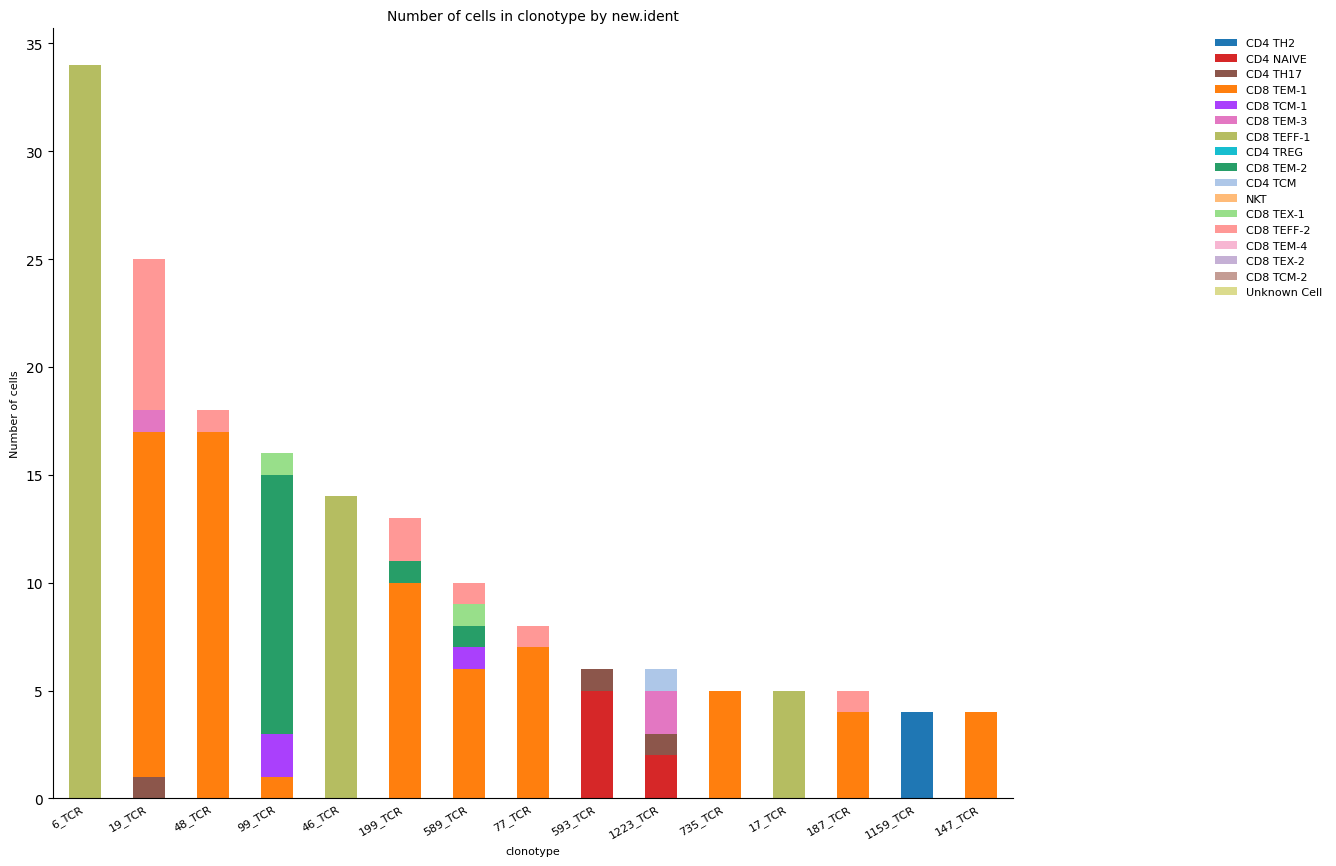

In [98]:
ir.pl.group_abundance(t3, groupby="clonotype", target_col="new.ident", max_cols=15,fig_kws={"dpi": 100})

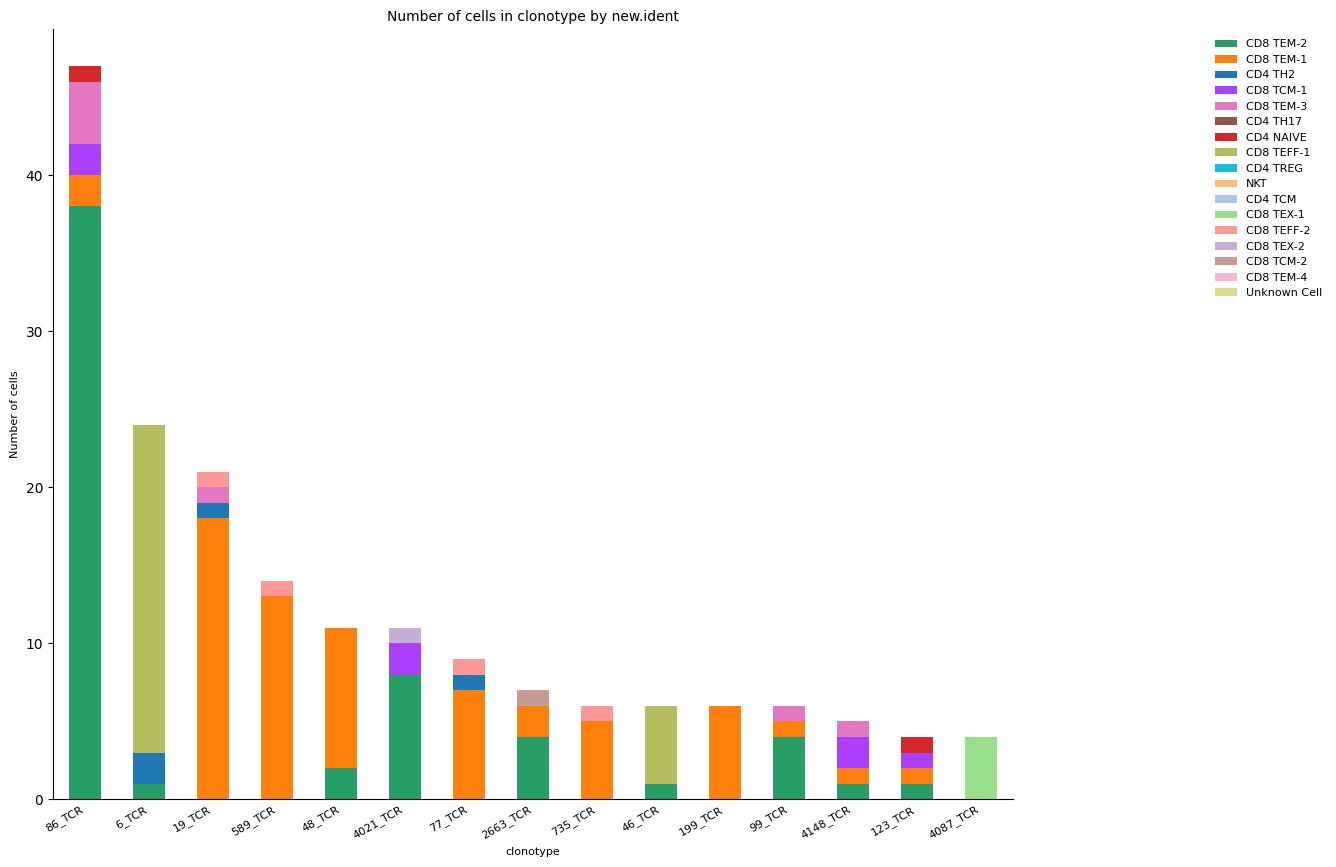

In [99]:
ir.pl.group_abundance(t4, groupby="clonotype", target_col="new.ident", max_cols=15,fig_kws={"dpi": 100})

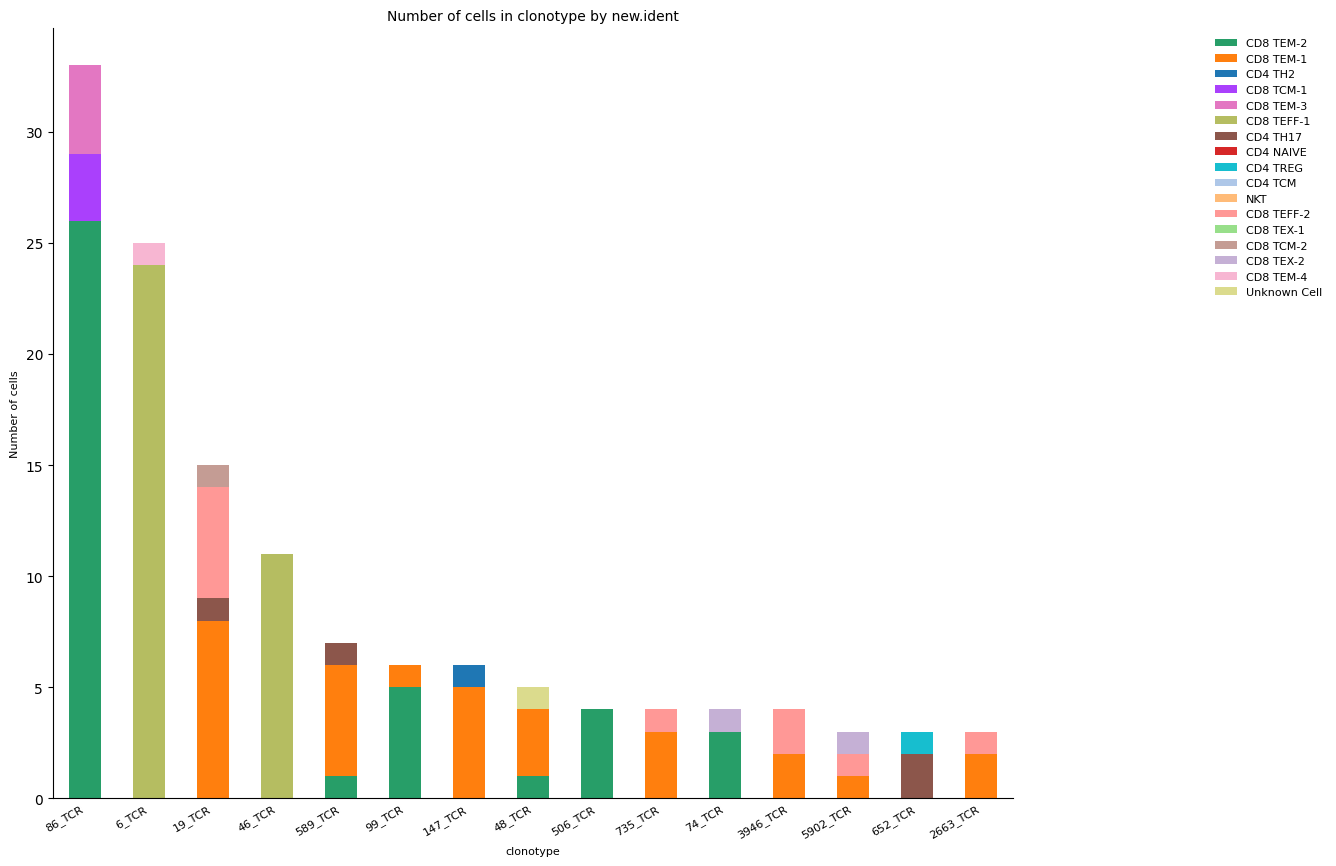

In [100]:
ir.pl.group_abundance(t5, groupby="clonotype", target_col="new.ident", max_cols=15,fig_kws={"dpi": 100})

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


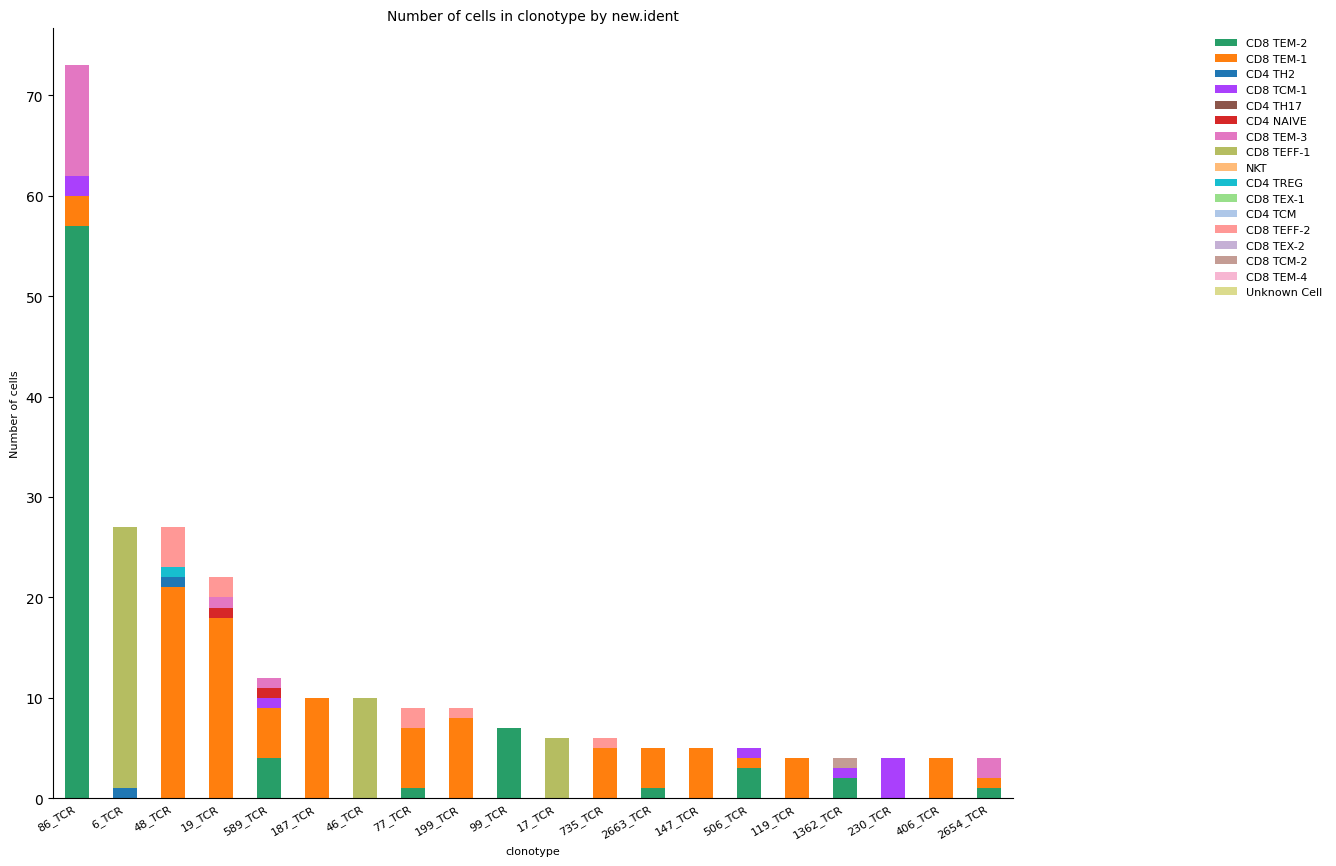

In [122]:
ir.pl.group_abundance(t6, groupby="clonotype", target_col="new.ident", max_cols=20,fig_kws={"dpi": 100})

In [104]:
cdex = adata[adata.obs['new.ident'].isin(['CD8 TEX-1','CD8 TEX-2'])]

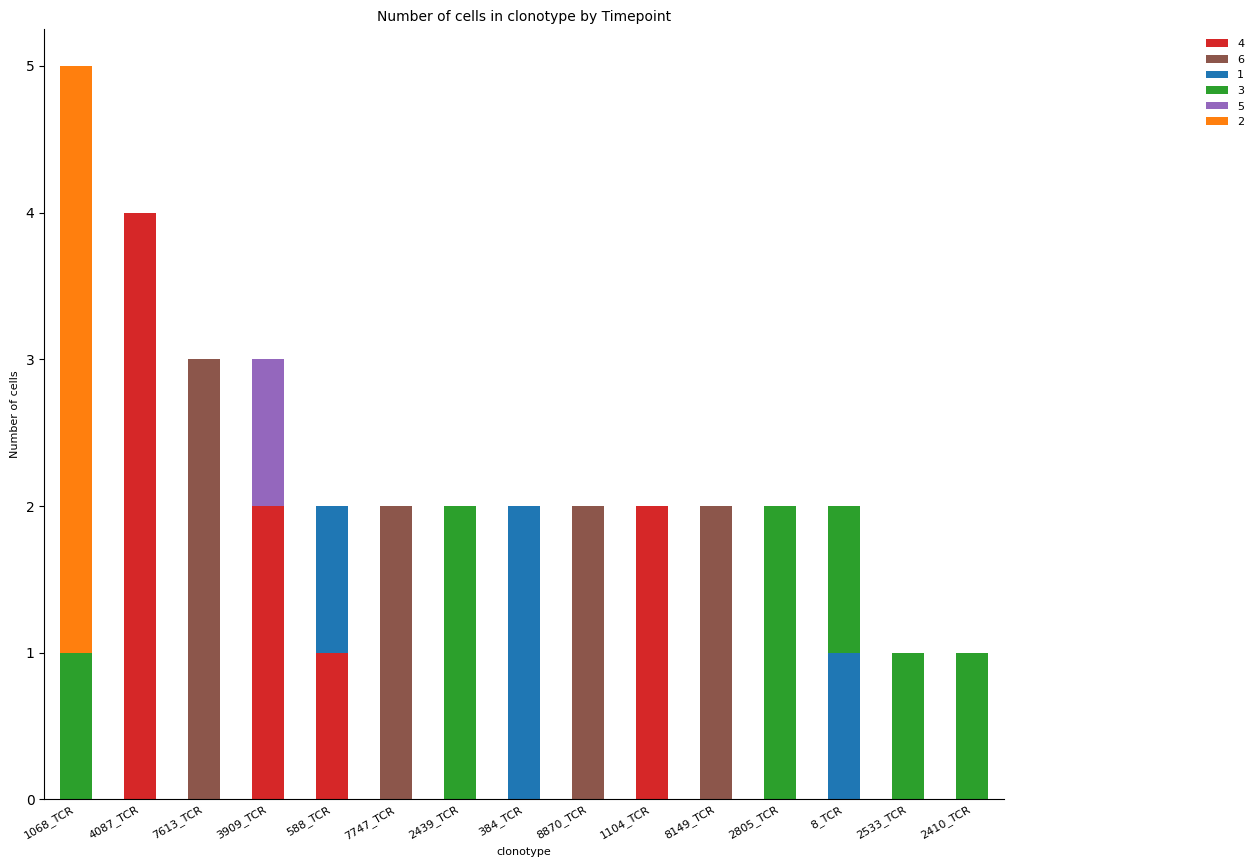

In [107]:
ir.pl.group_abundance(cdex, groupby="clonotype", target_col="Timepoint", max_cols=15,fig_kws={"dpi": 100})

In [108]:
cd8tem2 = adata[adata.obs['new.ident'].isin(['CD8 TEM-2'])]

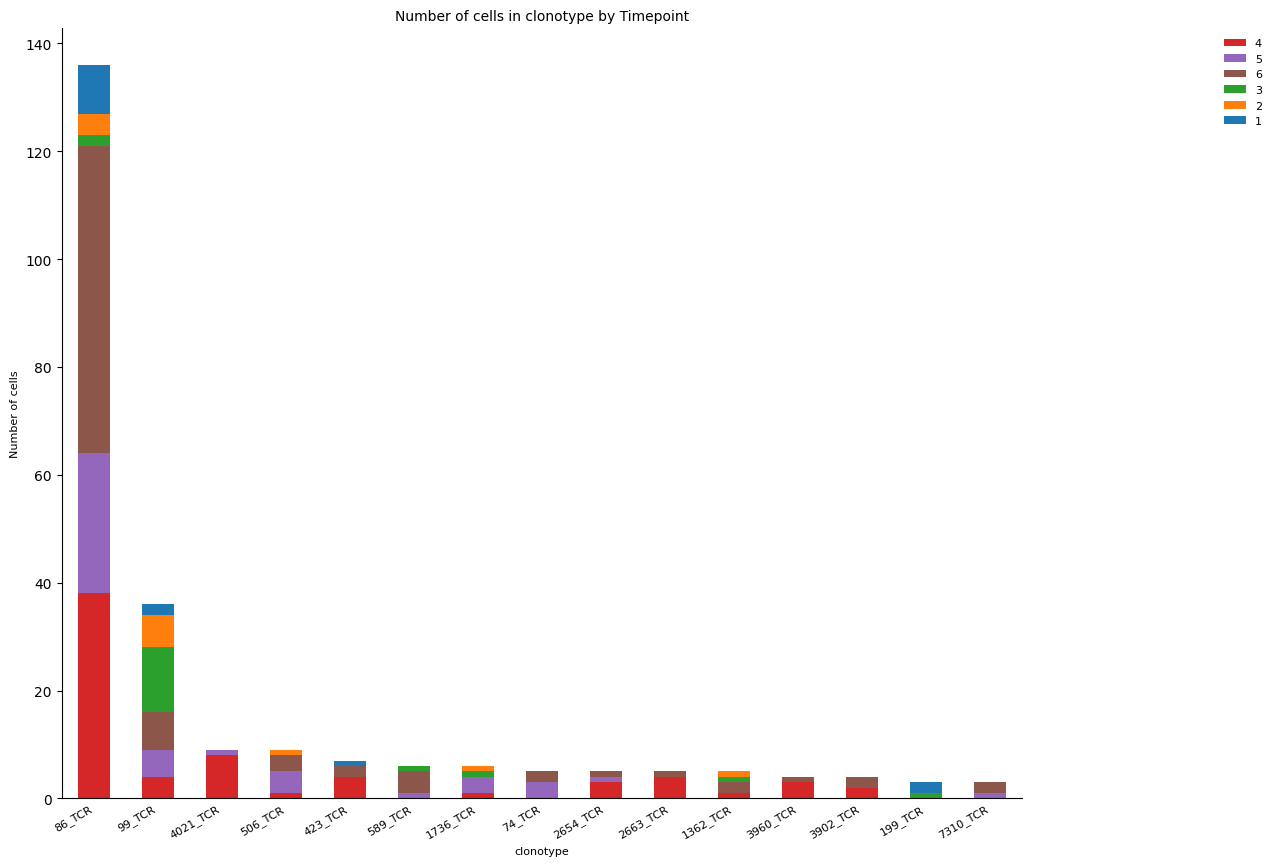

In [110]:
ir.pl.group_abundance(cd8tem2, groupby="clonotype", target_col="Timepoint", max_cols=15,fig_kws={"dpi": 100})

In [121]:
tp1.obs

nCount_RNA  nFeature_RNA  log10GenesPerUMI  \
Timepoint_1_AAACCTGAGAGAGCTC-1      3008.0          1184          0.883584   
Timepoint_1_AAACCTGGTGTTTGGT-1      2711.0          1256          0.902730   
Timepoint_1_AAACGGGTCTTGCCGT-1      1862.0           814          0.890105   
Timepoint_1_AAAGATGAGTCCAGGA-1      4551.0          1369          0.857384   
Timepoint_1_AAAGCAAAGGTGTGGT-1      2603.0          1056          0.885284   
...                                    ...           ...               ...   
Timepoint_1_TTTGGTTGTGATGTGG-1      3435.0          1316          0.882161   
Timepoint_1_TTTGGTTGTTGTACAC-1      2310.0          1034          0.896215   
Timepoint_1_TTTGGTTTCACTATTC-1      2813.0          1187          0.891360   
Timepoint_1_TTTGTCAGTGCAACTT-1      2693.0          1197          0.897342   
Timepoint_1_TTTGTCATCGCATGAT-1      3330.0          1311          0.885068   

                                percent_mito  percent_ribo  percent_hb  \
Timepoint_1_AAACCTGAGAGAGCTC-1      6.781915     29.953457    0.000000   
Timepoint_1_AAACCTGGTGTTTGGT-1      4.387906     24.151917    0.000000   
Timepoint_1_AAACGGGTCTTGCCGT-1      5.209452     30.612245    0.000000   
Timepoint_1_AAAGATGAGTCCAGGA-1      5.251593     39.485827    0.000000   
Timepoint_1_AAAGCAAAGGTGTGGT-1      5.186323     26.584710    0.000000   
...                                      ...           ...         ...   
Timepoint_1_TTTGGTTGTGATGTGG-1      2.561863     32.343523    0.029112   
Timepoint_1_TTTGGTTGTTGTACAC-1      4.761905     32.121212    0.000000   
Timepoint_1_TTTGGTTTCACTATTC-1      5.367935     28.012798    0.000000   
Timepoint_1_TTTGTCAGTGCAACTT-1      5.829929     22.428518    0.000000   
Timepoint_1_TTTGTCATCGCATGAT-1      5.195195     31.051051    0.000000   

                                 S.Score  G2M.Score Phase  nCount_SCT  \
Timepoint_1_AAACCTGAGAGAGCTC-1  0.034645   0.068198   G2M      3409.0   
Timepoint_1_AAACCTGGTGTTTGGT-1  0.021716   0.025207   G2M      3287.0   
Timepoint_1_AAACGGGTCTTGCCGT-1 -0.021759  -0.014021    G1      3266.0   
Timepoint_1_AAAGATGAGTCCAGGA-1  0.047148  -0.018358     S      3996.0   
Timepoint_1_AAAGCAAAGGTGTGGT-1 -0.045752   0.065598   G2M      3311.0   
...                                  ...        ...   ...         ...   
Timepoint_1_TTTGGTTGTGATGTGG-1 -0.016113  -0.045014    G1      3569.0   
Timepoint_1_TTTGGTTGTTGTACAC-1 -0.013597  -0.001618    G1      3227.0   
Timepoint_1_TTTGGTTTCACTATTC-1  0.030882   0.053791   G2M      3339.0   
Timepoint_1_TTTGTCAGTGCAACTT-1  0.061211   0.083783   G2M      3299.0   
Timepoint_1_TTTGTCATCGCATGAT-1  0.050649   0.031992     S      3520.0   

                                nFeature_SCT integrated_snn_res.0.8  \
Timepoint_1_AAACCTGAGAGAGCTC-1          1181                      2   
Timepoint_1_AAACCTGGTGTTTGGT-1          1253                      5   
Timepoint_1_AAACGGGTCTTGCCGT-1           838                      1   
Timepoint_1_AAAGATGAGTCCAGGA-1          1366                      2   
Timepoint_1_AAAGCAAAGGTGTGGT-1          1057                      3   
...                                      ...                    ...   
Timepoint_1_TTTGGTTGTGATGTGG-1          1309                      6   
Timepoint_1_TTTGGTTGTTGTACAC-1          1041                      5   
Timepoint_1_TTTGGTTTCACTATTC-1          1185                      2   
Timepoint_1_TTTGTCAGTGCAACTT-1          1195                      1   
Timepoint_1_TTTGTCATCGCATGAT-1          1305                      5   

                               seurat_clusters  new.ident  \
Timepoint_1_AAACCTGAGAGAGCTC-1               3    CD4 TH2   
Timepoint_1_AAACCTGGTGTTTGGT-1               4  CD8 TCM-1   
Timepoint_1_AAACGGGTCTTGCCGT-1               1  CD8 TEM-1   
Timepoint_1_AAAGATGAGTCCAGGA-1               3    CD4 TH2   
Timepoint_1_AAAGCAAAGGTGTGGT-1               2  CD8 TEM-2   
...                                        ...        ...   
Timepoint_1_TTTGGTTGTGATGTGG-1               9  C